In [1]:
import pandas as pd
df = pd.read_csv('c:/data/time/nile.csv')
df


,x
0,1120
1,1160
2,963
3,1210
4,1160
...,...
95,746
96,919
97,718
98,714


<AxesSubplot:>

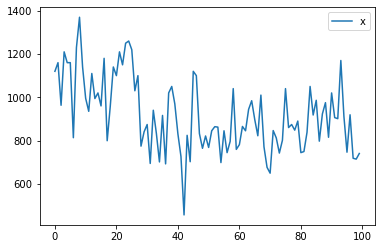

In [2]:
df.plot()

<AxesSubplot:>

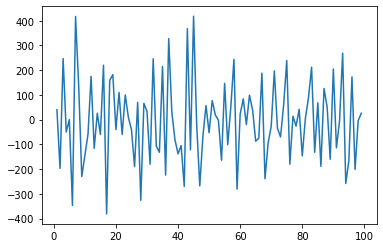

In [3]:
# 1차 차분 데이터
diff1=df['x'].diff(periods=1).iloc[1:]
diff1.plot()


In [4]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
# 로그 후 차분한 자료를 adfuller함수로 안정적인 시계열인지 확인
diff1=np.log(df['x']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함 안정적인 시계열 자료임)


(-4.748414786012469, 6.818878743916839e-05, 9, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -64.46023083112888)
ADF Statistic: -4.748415
p-value: 0.000068


In [5]:
from pmdarima.arima import auto_arima
model = auto_arima(df,suppress_warnings=True)
model
# arima(1,1,1)

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
# 학습용, 검증용 구분
n=int(df.shape[0]*.8)
train = df[:n]
test = df[n:]
print(len(df['x']))
print(train['x'].values)
print(test['x'].values)

100
[1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994
 1020  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100
  774  840  874  694  940  833  701  916  692 1020 1050  969  831  726
  456  824  702 1120 1100  832  764  821  768  845  864  862  698  845
  744  796 1040  759  781  865  845  944  984  897  822 1010  771  676
  649  846  812  742  801 1040  860  874  848  890]
[ 744  749  838 1050  918  986  797  923  975  815 1020  906  901 1170
  912  746  919  718  714  740]


In [7]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(1,1,1)).fit()


c:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [8]:
# 예측값
fore = model.forecast(steps=5)
print(fore)
# 예측값, stderr, upper bound, lower bound

(array([801.84451724, 769.06413463, 755.13052926, 747.61137751,
       742.27536907]), array([139.36458811, 147.21695442, 148.10022807, 148.20240325,
       148.21430254]), array([[ 528.69494383, 1074.99409065],
       [ 480.52420606, 1057.6040632 ],
       [ 464.85941613, 1045.40164238],
       [ 457.14000473, 1038.0827503 ],
       [ 451.7806741 , 1032.77006404]]))


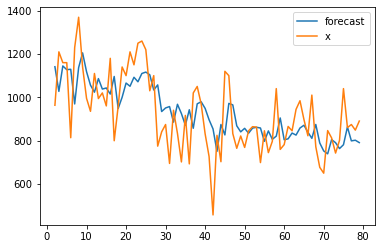

In [9]:
import matplotlib.pyplot as plt
# 실제값과 예측값
model.plot_predict()
plt.show()

[ 744  749  838 1050  918  986  797  923  975  815 1020  906  901 1170
  912  746  919  718  714  740]
[801.84451724 769.06413463 755.13052926 747.61137751 742.27536907
 737.682388   733.34229444 729.08827052 724.86354018 720.64877984
 716.43741277 712.22720059 708.01738147 703.80769612 699.59805631
 695.388432   691.17881296 686.96919571 682.75957908 678.54996265]


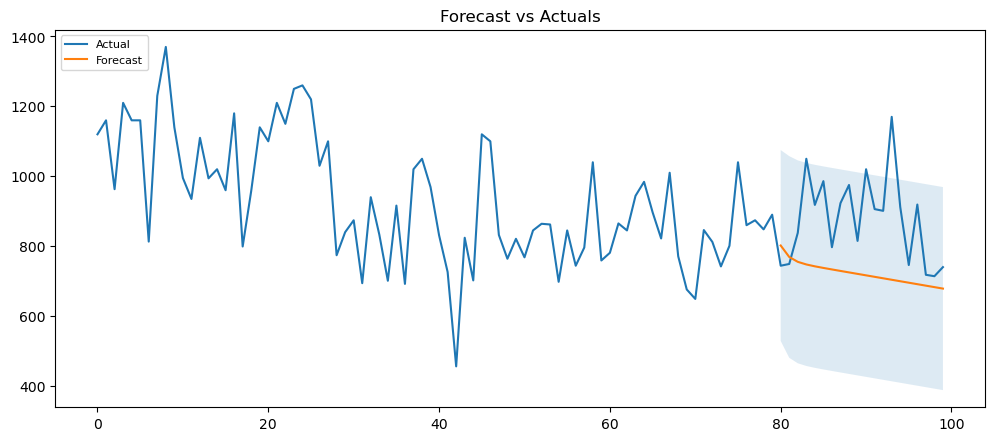

In [13]:
fc, se, conf = model.forecast(steps=len(test))
print(test['x'].values)
print(fc)
fc_series = pd.Series(fc,index=test.index)
lower = pd.Series(conf[:, 0],index=test.index)
upper = pd.Series(conf[:, 1],index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: Input could not be cast to an at-least-1D NumPy array

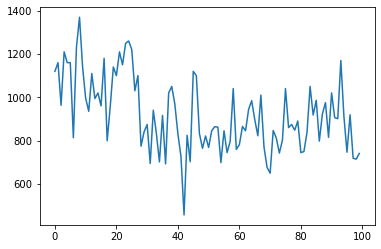

In [12]:
# 예측값, standard error, upper bound/lower bound
a = model.forecast(steps=len(test))
plt.plot(df, label='Actual')
plt.plot(a, label='Forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()